<a href="https://colab.research.google.com/github/satriaabraarr/PCVK_Ganjil_2024/blob/main/Modul5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

# 1. Buat Gamma Correction sesuai dengan petunjuk berikut

Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: 3


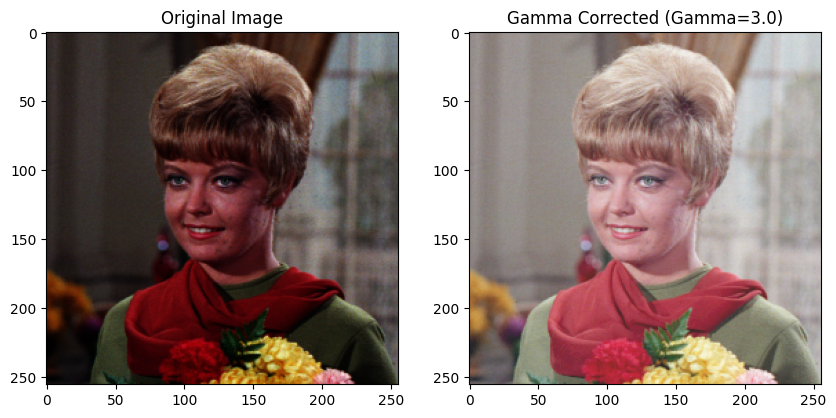

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Meminta input dari pengguna
print('Gamma Correction pada citra')
print('----------------------------------')
try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')
    exit()

# Fungsi untuk melakukan Gamma Correction
def gamma_correction(image, gamma):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Membaca citra
image = cv2.imread('/content/drive/MyDrive/PCVK/image/female.tiff')

# Cek apakah citra berhasil dibaca
if image is None:
    print('Error: Gambar tidak ditemukan!')
    exit()

# Terapkan Gamma Correction
corrected_image = gamma_correction(image, gamma)

# Ubah citra dari BGR ke RGB untuk keperluan plotting dengan Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
corrected_image_rgb = cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB)

# Menampilkan citra asli dan citra setelah Gamma Correction secara berdampingan
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(corrected_image_rgb)
plt.title(f'Gamma Corrected (Gamma={gamma})')
plt.axis('on')

plt.show()

# 2. Buat Simulasi Image Depth

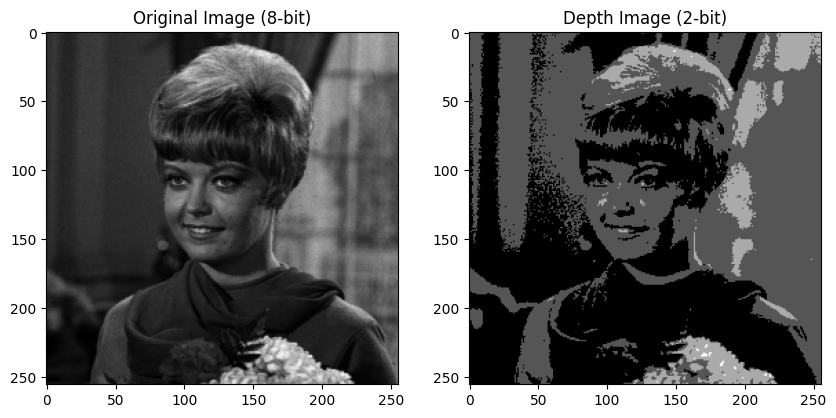

In [ ]:
# Nilai kedalaman bit yang ingin digunakan
bit_depth = 2

# Menghitung level warna berdasarkan kedalaman bit
level = 255 / (pow(2, bit_depth) - 1)

# Membaca citra masukan dalam mode grayscale
original = cv.imread('/content/drive/MyDrive/PCVK/image/female.tiff', cv.IMREAD_GRAYSCALE)

# Membuat citra baru dengan kedalaman bit yang disimulasikan
depth_image = np.zeros(original.shape, original.dtype)

# Simulasi kuantisasi kedalaman bit
for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        # Melakukan quantisasi pada tiap pixel
        depth_image[i, j] = round(original[i, j] / level) * level

# Menampilkan citra asli dan citra hasil kedalaman bit yang baru
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(original, cmap='gray')
plt.title('Original Image (8-bit)')
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(depth_image, cmap='gray')
plt.title(f'Depth Image ({bit_depth}-bit)')
plt.axis('on')

plt.show()

# 3. Buat modul Average Denoising

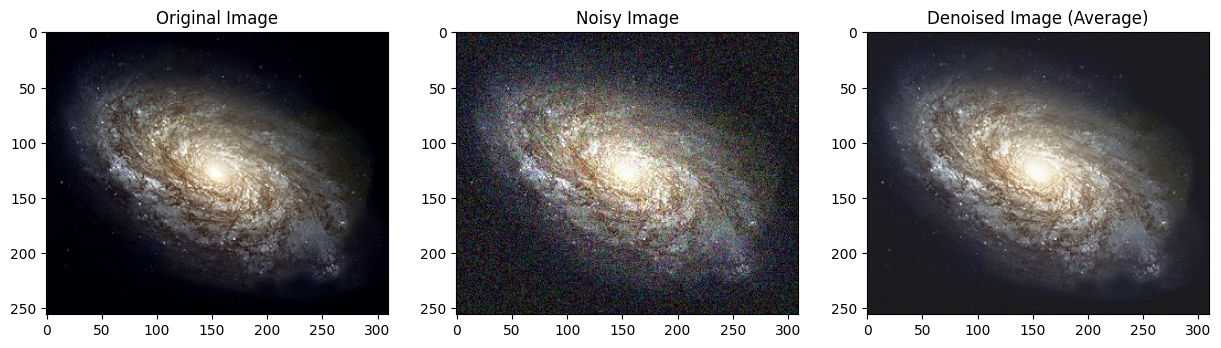

In [ ]:
import glob

# Fungsi untuk melakukan Average Denoising
def average_denoising(image_list):
    # Inisialisasi array dengan ukuran dan tipe yang sama dengan gambar
    avg_image = np.zeros_like(image_list[0], dtype=np.float32)

    # Menambahkan setiap gambar ke citra rata-rata
    for img in image_list:
        avg_image += img.astype(np.float32)

    # Membagi dengan jumlah gambar untuk mendapatkan rata-rata
    avg_image /= len(image_list)

    # Konversi kembali ke tipe uint8 untuk citra yang dapat ditampilkan
    return avg_image.astype(np.uint8)

# Membaca semua citra dengan Gaussian Noise di folder /images/noises/
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/image/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

# Melakukan Average Denoising
denoised_image = average_denoising(cv_img)

# Membaca citra asli untuk perbandingan
original_image = cv.imread('/content/drive/MyDrive/PCVK/image/galaxy.jpg')

# Menampilkan citra asli, citra dengan noise (contoh salah satu), dan citra hasil denoising
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('on')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(cv_img[0], cv.COLOR_BGR2RGB))
plt.title('Noisy Image')
plt.axis('on')

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(denoised_image, cv.COLOR_BGR2RGB))
plt.title('Denoised Image (Average)')
plt.axis('on')

plt.show()

Masukkan jumlah citra yang akan di-average: 10
Hasil PSNR telah disimpan ke file CSV.
Jumlah citra yang di-average: 10
Nilai PSNR (dB): 27.55
Kesimpulan: Citra hasil denoising memiliki kualitas yang cukup baik.


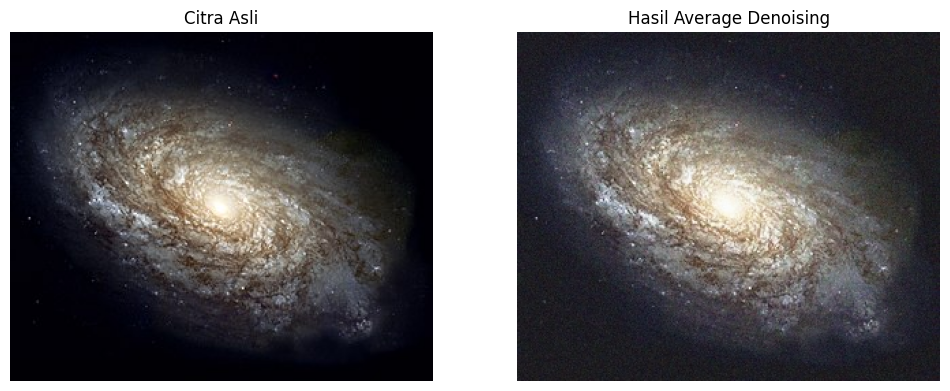

In [4]:
import cv2 as cv
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt

def calculate_mse(image1, image2):
    # Menghitung Mean Squared Error (MSE)
    mse = np.mean((image1 - image2) ** 2)
    return mse

def calculate_psnr(original_image, denoised_image):
    # Menghitung PSNR
    mse = calculate_mse(original_image, denoised_image)
    if mse == 0:
        return float('inf')  # Tidak ada perbedaan antara citra
    max_pixel = 255.0
    psnr = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr

# Membaca citra asli
original_image = cv.imread('/content/drive/MyDrive/PCVK/image/galaxy.jpg')

# Memuat semua citra dengan Gaussian Noise dari folder
noisy_images = []
for img_path in glob.glob('/content/drive/MyDrive/PCVK/image/noises/*.jpg'):
    noisy_image = cv.imread(img_path)
    noisy_images.append(noisy_image)

# Input jumlah citra yang di-average dari pengguna
num_images_to_average = int(input("Masukkan jumlah citra yang akan di-average: "))

# Pastikan jumlah citra yang diminta tidak melebihi jumlah citra yang tersedia
num_images_to_average = min(num_images_to_average, len(noisy_images))

# Lakukan average denoising
avg_image = np.zeros_like(noisy_images[0], dtype=np.float32)
for i in range(num_images_to_average):
    avg_image += noisy_images[i].astype(np.float32)
avg_image /= num_images_to_average
avg_image = np.clip(avg_image, 0, 255).astype(np.uint8)

# Hitung PSNR antara citra asli dan citra hasil average denoising
psnr_value = calculate_psnr(original_image, avg_image)

# Catat hasil PSNR ke dalam tabel
results_df = pd.DataFrame({
    'No': [1],
    'Jumlah Citra di Average': [num_images_to_average],
    'Image Hasil Nilai PSNR (dB)': [psnr_value]
})

# Simpan DataFrame ke file CSV
results_df.to_csv('/content/drive/MyDrive/PCVK/image/psnr_results.csv', index=False)

print("Hasil PSNR telah disimpan ke file CSV.")
print(f"Jumlah citra yang di-average: {num_images_to_average}")
print(f"Nilai PSNR (dB): {psnr_value:.2f}")

# Menarik kesimpulan
if psnr_value > 30:
    print("Kesimpulan: Citra hasil denoising memiliki kualitas yang baik.")
elif psnr_value > 20:
    print("Kesimpulan: Citra hasil denoising memiliki kualitas yang cukup baik.")
else:
    print("Kesimpulan: Citra hasil denoising memiliki kualitas yang kurang baik.")

# Tampilkan gambar asli dan hasil denoising
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Hasil Average Denoising')
plt.imshow(cv.cvtColor(avg_image, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

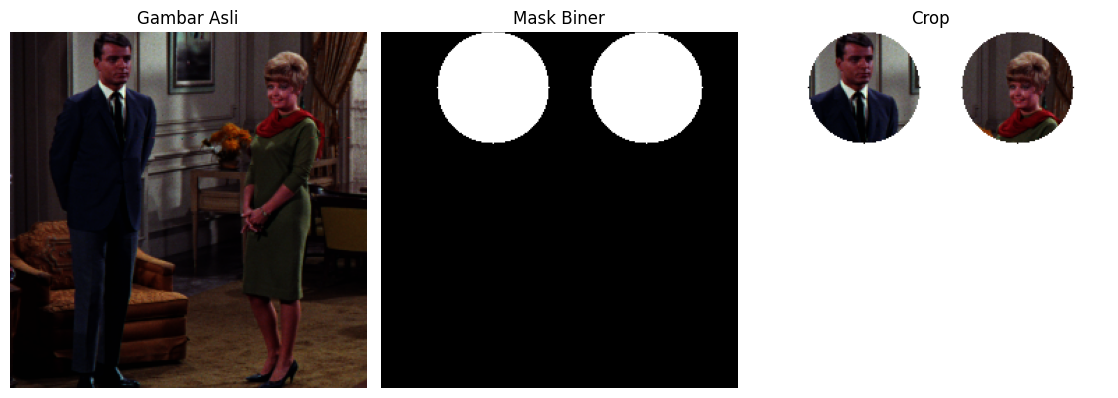

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar asli (couple.tiff)
gambar_asli = cv2.imread('/content/drive/MyDrive/PCVK/image/couple.tiff')

# Mengubah gambar dari BGR ke RGB untuk ditampilkan dengan matplotlib
gambar_asli_rgb = cv2.cvtColor(gambar_asli, cv2.COLOR_BGR2RGB)

# Membuat mask biner dengan dua lingkaran pada posisi yang berbeda
mask = np.zeros(gambar_asli.shape[:2], dtype="uint8")

# Menggambar dua lingkaran pada mask (dua area mask)
cv2.circle(mask, (80, 40), 40, 255, -1)  # Lingkaran pertama di koordinat (80, 40)
cv2.circle(mask, (190, 40), 40, 255, -1)  # Lingkaran kedua di koordinat (190, 40)


# Membuat inverse mask
mask_inverse = cv2.bitwise_not(mask)

# Mengambil area foreground dari gambar asli
foreground = cv2.bitwise_and(gambar_asli, gambar_asli, mask=mask)

# Membuat background hitam dengan mask inverse
background = cv2.bitwise_and(gambar_asli, gambar_asli, mask=mask_inverse)

# Menampilkan gambar asli, mask, dan hasil masking
plt.figure(figsize=(15, 5))

# Gambar Asli
plt.subplot(1, 4, 1)
plt.imshow(gambar_asli_rgb)
plt.title('Gambar Asli')
plt.axis('off')

# Mask Biner (hitam-putih)
plt.subplot(1, 4, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask Biner')
plt.axis('off')

# Hasil Masking Lingkaran 1
# Ubah area hitam (nilai 0) menjadi putih (nilai 255)
lingkaran1 = cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)
lingkaran1[lingkaran1 == 0] = 255

# Menampilkan lingkaran dengan background putih
plt.subplot(1, 4, 3)
plt.imshow(lingkaran1)
plt.title('Crop')
plt.axis('off')


plt.tight_layout()
plt.show()

Masukkan operator biner (NOT, OR, AND, NAND, XOR): NOT


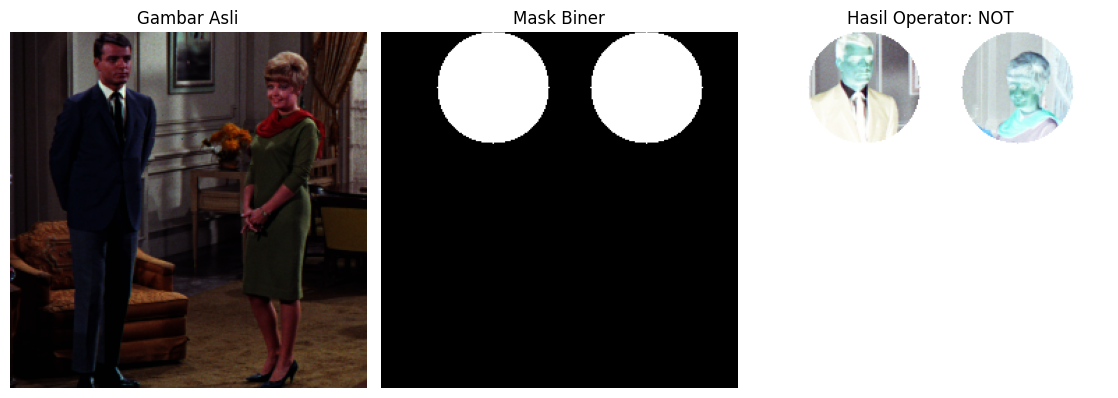

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menerapkan operator biner pada gambar
def apply_operator(operator, img1, img2):
    if operator == 'NOT':
        return cv2.bitwise_not(img1)
    elif operator == 'OR':
        return cv2.bitwise_or(img1, img2)
    elif operator == 'AND':
        return cv2.bitwise_and(img1, img2)
    elif operator == 'NAND':
        return cv2.bitwise_not(cv2.bitwise_and(img1, img2))
    elif operator == 'XOR':
        return cv2.bitwise_xor(img1, img2)
    else:
        print("Operator tidak valid!")
        return None

# Membaca gambar asli (couple.tiff)
gambar_asli = cv2.imread('/content/drive/MyDrive/PCVK/image/couple.tiff')

# Mengubah gambar dari BGR ke RGB untuk ditampilkan dengan matplotlib
gambar_asli_rgb = cv2.cvtColor(gambar_asli, cv2.COLOR_BGR2RGB)

# Membuat mask biner dengan dua lingkaran pada posisi yang berbeda
mask = np.zeros(gambar_asli.shape[:2], dtype="uint8")
cv2.circle(mask, (80, 40), 40, 255, -1)  # Lingkaran pertama di koordinat (80, 40)
cv2.circle(mask, (190, 40), 40, 255, -1)  # Lingkaran kedua di koordinat (190, 40)

# Membuat inverse mask
mask_inverse = cv2.bitwise_not(mask)

# Mengambil area foreground dan background dari gambar asli
foreground = cv2.bitwise_and(gambar_asli, gambar_asli, mask=mask)
background = cv2.bitwise_and(gambar_asli, gambar_asli, mask=mask)

# Menerima input operator dari pengguna
operator = input("Masukkan operator biner (NOT, OR, AND, NAND, XOR): ").upper()

# Menerapkan operator biner yang dipilih
output_image = apply_operator(operator, foreground, background)

if output_image is not None:
    # Ubah gambar hasil dari BGR ke RGB untuk ditampilkan
    output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

    # Menampilkan gambar asli, mask, dan hasil dari operator yang dipilih
    plt.figure(figsize=(15, 5))

    # Gambar Asli
    plt.subplot(1, 4, 1)
    plt.imshow(gambar_asli_rgb)
    plt.title('Gambar Asli')
    plt.axis('off')

    # Mask Biner
    plt.subplot(1, 4, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Mask Biner')
    plt.axis('off')

    # Gambar Hasil Operator
    plt.subplot(1, 4, 3)
    plt.imshow(output_image_rgb)
    plt.title(f'Hasil Operator: {operator}')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Gagal memproses gambar dengan operator yang dipilih.")